# Graph: Multi-resource Run 4 JT
This uses the pkl outputs from the salabim and slurmtrain notebooks

## TODO: 
- Other
    - [ ] Add diag_start and diag_end creation to run_job_trace script
    - [ ] Automate X_batch salabim model
    - [ ] Automate X_batch slurmtrain data

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab

# size: Either a relative value of 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large' 
#     or an absolute font size, e.g., 10. Default: rcParams["font.size"] (default: 10.0)

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
# Setup Paths
path_slurmtrain = Path(r"/home/overlytic/thesis/notebooks/slurm_train/output/sacct")
path_slurmsim = Path(r"/mnt/wsl/instances/Ubuntu-18.04//home/slurm/slurm_sim_ws/slurm_sim_tools/slurm_batches/simple_traces/srun")

In [4]:
# Parameters

myrun_short_id = "4jt-13C13R-1PE50"
myrun_short_id_sala = "4jt-13C-13R-n500"

## Main run
myrun_type = "fiforun-multiresource-4jt" # for graphs

myrun_type_short = "fiforun"
myrun_shortname = f"{myrun_type_short}_{myrun_short_id}"
myrun_shortname_sala = f"{myrun_type_short}_{myrun_short_id_sala}"

print(f"myrun_shortname: {myrun_shortname}")
print(f"myrun_shortname_sala: {myrun_shortname_sala}")

## General Param
save_csv = True
clear_big_dict = False

# Main Metrics for 'wait table all metrics'
metrics = ['min', 'max',  'std', 'mean']
metric_names = ['min', 'max', '$s_{dev}$', 'average']

# Constants
NODE_CPUS = 8 
NODE_RAM = 59392

myrun_shortname: fiforun_4jt-13C13R-1PE50
myrun_shortname_sala: fiforun_4jt-13C-13R-n500


In [5]:
# myrun_savepath = Path('.') / myrun_type / myrun_shortname
# print(f"Output folder: {myrun_savepath}")

In [6]:
# Paths
thesis_path = Path(".")
save_image_path = thesis_path / "images" / "results"
save_data_path = thesis_path / "images" / "data"

In [7]:
# Helper functions

def extract_run_num(f, run_type):
    """
    f : string filename e.g. srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct
    Result : '10' on error return -1
    """
    run_search = re.search(f".*-run(.*)_{run_type}.*.pkl", f)
    
    run = -1 # default
    
    if run_search:
        srun = run_search.group(1)
        
        if srun.isdigit():
            run = int(srun)
        
    return run

In [8]:
# write the above as a function ... quickly ... 
def load_run_filelist(myrun_shortname, myrun_model, myrun_filename, folder_path=save_data_path, sort=True, return_detail=False):
    
    file_search_string = f'*{myrun_shortname}*{myrun_model}*{myrun_filename}'
    filelist_all = list(folder_path.glob(file_search_string))

    if filelist_all:
        # Extract run numbers
        run_nums_all = [extract_run_num(p.name, myrun_model) for p in filelist_all]
        
        if sort: 
            # Sort paths based on valid run numbers
            ind_sort = np.argsort(run_nums_all)
            ind_sort_valid = [ind_sort[i] for i, value in enumerate(run_nums_all) if value > 0]
            run_nums_sorted = [run_nums_all[i] for i in ind_sort_valid]
            filelist_sorted = [filelist_all[i] for i in ind_sort_valid]
                        
            if return_detail:
                return filelist_sorted, run_nums_sorted, file_search_string  
            else:
                return filelist_sorted
        
        else:
            if return_detail:
                return filelist_all, run_nums_all, file_search_string 
            else: 
                return filelist_all
        
    else:
        
        if return_detail:
            return [], [], file_search_string
        else: 
            return []

In [9]:
# Example for laoding runs:
strain_dfacct_sorted, strain_run_nums, strain_search_string = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl", return_detail=True)

if strain_dfacct_sorted: 
    print(f"slurmtrain runs count: {len(strain_run_nums)}")
    print(f"slurmtrain run nums: {strain_run_nums}")
    for x in strain_dfacct_sorted: print(x)
else: 
    print(f"No files found for search string: {strain_search_string}\n in path: {save_data_path.absolute()}")

slurmtrain runs count: 10
slurmtrain run nums: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
images/data/srun8_fiforun_4jt-13C13R-1PE50-run1_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run2_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run3_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run4_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run5_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run6_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run7_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run8_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run9_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_4jt-13C13R-1PE50-run10_slurmtrain_dfacct.pkl


# Load Run File List

## SlurmTrain

### FIFO Runs

In [10]:
strain_fifo_dfacct_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl")
strain_fifo_dfpetime_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfpetime.pkl")

print(f"strain_fifo_dfacct_sorted: {len(strain_fifo_dfacct_sorted)}")
print(f"strain_fifo_dfacct_sorted: {len(strain_fifo_dfacct_sorted)}")

strain_fifo_dfacct_sorted: 10
strain_fifo_dfacct_sorted: 10


In [11]:
# strain_fifo_dfacct_sorted
# strain_fifo_dfpetime_sorted

## Salabim

### FIFO Runs

In [12]:
sala_fifo_dfjobs_sorted = load_run_filelist(myrun_shortname_sala, "salabim", "dfjobs.pkl")
sala_fifo_dfpetime_sorted = load_run_filelist(myrun_shortname_sala, "salabim", "dfpetime.pkl")

print(f"sala_fifo_dfjobs_sorted: {len(sala_fifo_dfjobs_sorted)}")
print(f"sala_fifo_dfpetime_sorted: {len(sala_fifo_dfpetime_sorted)}")

sala_fifo_dfjobs_sorted: 10
sala_fifo_dfpetime_sorted: 10


In [13]:
# sala_fifo_dfjobs_sorted
# sala_fifo_dfpetime_sorted

In [14]:
# LOAD RUNS

load_runs = range(1, 11)
print(list(load_runs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Load Runs

In [15]:
def calc_strain_wait(sacct_df):
    
    sacct_df.pe_req = sacct_df.pe_req.round(0).astype(int)
    
    wait_table = (sacct_df
     .loc[:, ['Account', 'JobName', 'pe_req', 'wait_time', 'elapsed_time']]
     .assign(job_prio =
             lambda x: np.select([x.Account == "training", x.Account=="crucial"],
                                 [1, 10]))
     .rename(columns = {'elapsed_time':'run_time',
                        'pe_req': 'job_pe_req',
                        'JobName' : 'job_number'})
     .groupby(['job_prio', 'job_pe_req'])
#       .groupby(['job_prio'])
      .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
           "job_number" : ["count"] #,
           # "backfill" : ["sum"]
            })
     .reset_index()
    )
    
    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')
    
    return wait_table

# # # Test:
# sacct_df = pd.read_pickle(strain_dfacct_sorted[0], compression='infer')
# w_strain = calc_strain_wait(sacct_df)
# w_strain

In [16]:
def calc_sala_wait(df_jobs):
    
    df_jobs.job_pe_req = df_jobs.job_pe_req.round(0).astype(int)
    
    wait_table = (df_jobs
    #      .merge(df_job_idx, on="job_name", how="inner")
                  .loc[:, ['job_number', 'job_pe_req', 
                           'job_prio', 'wait_time', 'run_time', 
                           'backfill']]
                   .groupby(['job_prio', 'job_pe_req'])
#                   .groupby(['job_prio'])                  
                  .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
#            "job_pe_req" : ["mean"],
           "job_number" : ["count"],
           "backfill" : ["sum"]
            })
     .reset_index())

    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')

    return(wait_table)
    
# # Test
# df_jobs = pd.read_pickle(salabim_dfjobs_sorted[0])
# w_sala = calc_sala_wait(df_jobs)
# w_sala

## SlurmTrain Runs

In [17]:
# Read SlurmTrain FIFO Runs and make table with wait times

strain_fifo_lst_wait = []

num_runs = len(strain_fifo_dfacct_sorted)

load_bf = False
list_sacct = strain_fifo_dfacct_sorted
list_petime = strain_fifo_dfpetime_sorted
list_bf = None

dic_st_fifo_sacct = {}
dic_st_fifo_petime = {}
dic_st_fifo_bfdata = None

for i in range(num_runs):
    
    # SAcct
    sacct_path = list_sacct[i]
    df_sacct = pd.read_pickle(sacct_path)
    dic_st_fifo_sacct[i] = df_sacct
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_st_fifo_petime[i] = df_petime
    
    # Calc Wait Time
    strain_wait = calc_strain_wait(df_sacct)

    # BF Info
    if load_bf:
        bf_path = list_bf[i]
        dic_bf = pd.read_pickle(bf_path)
        dic_st_fifo_bfdata[i] = dic_bf
        strain_wait['Total_run_backfills'] = dic_bf['backfill_count']
    else: 
        strain_wait['Total_run_backfills'] = 0
    
    # Other Info
    strain_wait['RunNum'] = i+1
    strain_wait['RunType'] = 'slurmtrain'
    strain_wait['SchedType'] = 'FIFO'
    
    
    strain_fifo_lst_wait.append(strain_wait)
    
df_wait_fifo_strain = pd.concat(strain_fifo_lst_wait)

df_wait_fifo_strain.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,11.687243,30.917695,243,0,1,slurmtrain,FIFO
1,1,3,10.883268,31.361868,257,0,1,slurmtrain,FIFO
0,1,1,6.745174,33.320463,259,0,2,slurmtrain,FIFO
1,1,3,13.456432,31.008299,241,0,2,slurmtrain,FIFO
0,1,1,6.561069,30.064885,262,0,3,slurmtrain,FIFO
1,1,3,8.273109,29.487395,238,0,3,slurmtrain,FIFO
0,1,1,3.592058,31.425993,277,0,4,slurmtrain,FIFO
1,1,3,6.430493,28.874439,223,0,4,slurmtrain,FIFO
0,1,1,4.554688,29.457031,256,0,5,slurmtrain,FIFO
1,1,3,6.733607,30.774590,244,0,5,slurmtrain,FIFO


## Salabim

In [18]:
# Read SlurmTrain FIFO Runs and make table with wait times

sala_fifo_lst_wait = []

num_runs = len(sala_fifo_dfjobs_sorted)

list_jobs = sala_fifo_dfjobs_sorted
list_petime = sala_fifo_dfpetime_sorted

dic_sala_fifo_dfjobs = {}
dic_sala_fifo_petime = {}

for i in range(num_runs):
    
    # SAcct
    dfjobs_path = list_jobs[i]
    df_jobs = pd.read_pickle(dfjobs_path)
    dic_sala_fifo_dfjobs[i] = df_jobs
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_sala_fifo_petime[i] = df_petime
        
    # Calc Wait Time
    sala_wait = calc_sala_wait(df_jobs)
        
    sala_wait['Total_run_backfills'] = sala_wait.backfill_sum.sum()
        
    sala_wait['RunNum'] = i+1
    sala_wait['RunType'] = 'salabim'
    sala_wait['SchedType'] = 'FIFO'
    
    
    sala_fifo_lst_wait.append(sala_wait)
    
df_wait_fifo_sala = pd.concat(sala_fifo_lst_wait)

df_wait_fifo_sala.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,backfill_sum,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,12.119342,30.736626,243,0,0,1,salabim,FIFO
1,1,3,12.260700,31.155642,257,0,0,1,salabim,FIFO
0,1,1,10.810811,33.135135,259,0,0,2,salabim,FIFO
1,1,3,18.987552,30.796680,241,0,0,2,salabim,FIFO
0,1,1,8.175573,29.896947,262,0,0,3,salabim,FIFO
1,1,3,10.306723,29.273109,238,0,0,3,salabim,FIFO
0,1,1,5.119134,31.194946,277,0,0,4,salabim,FIFO
1,1,3,10.448430,28.677130,223,0,0,4,salabim,FIFO
0,1,1,5.296875,29.292969,256,0,0,5,salabim,FIFO
1,1,3,8.004098,30.553279,244,0,0,5,salabim,FIFO


In [19]:
# Combine data from the salabim and strain

df_wait_combo = pd.concat([df_wait_fifo_strain,
                           df_wait_fifo_sala])

In [20]:
# CLEAR BIG Dictionary variables -> rerun if needed

loc = list(locals().keys())

if clear_big_dict:
    print(f"Clearing big dictionary variables ... ")
    count = 0
    for _var in loc:
        if re.match(pattern="^dic_(.+)", string=_var):
            print(f"  Deleting: '{_var}'")
            exec(f'del {_var}')
            count += 1

    if count == 0: print("No dictionaries variables were found to clear")
            
del loc

In [21]:
# Write csv file

if save_csv: 
    filename = f"{myrun_shortname}_data.csv"
    df_wait_combo.to_csv(thesis_path / "temp" / filename)

In [22]:
dic_st_fifo_sacct[0]



,Account,AdminComment,AllocCPUS,AllocNodes,AllocTRES,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,...,submit_date,eligible_date,start_date,end_date,wait_time,elapsed_time,time_limit,pet,batch_name,batch_value
0,training,,3,1,"billing=3,cpu=3,mem=7424M,node=1",19,,,,,...,2023-08-20 12:28:16,2023-08-20 12:28:16,2023-08-20 12:28:16,2023-08-20 12:28:25,0.0,9.0,60.0,27.0,03_Inter_13.0,13
1,training,,3,1,"billing=3,cpu=3,mem=22272M,node=1",19,,,,,...,2023-08-20 12:28:26,2023-08-20 12:28:26,2023-08-20 12:28:26,2023-08-20 12:28:37,0.0,11.0,60.0,33.0,03_Inter_13.0,13
2,training,,1,1,"billing=1,cpu=1,mem=22272M,node=1",19,,,,,...,2023-08-20 12:29:07,2023-08-20 12:29:07,2023-08-20 12:29:08,2023-08-20 12:29:20,1.0,12.0,60.0,36.0,03_Inter_13.0,13
3,training,,1,1,"billing=1,cpu=1,mem=7424M,node=1",19,,,,,...,2023-08-20 12:29:28,2023-08-20 12:29:28,2023-08-20 12:29:29,2023-08-20 12:29:30,1.0,1.0,60.0,1.0,03_Inter_13.0,13
4,training,,1,1,"billing=1,cpu=1,mem=22272M,node=1",19,,,,,...,2023-08-20 12:29:36,2023-08-20 12:29:36,2023-08-20 12:29:37,2023-08-20 12:29:52,1.0,15.0,60.0,45.0,03_Inter_13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,training,,1,1,"billing=1,cpu=1,mem=22272M,node=1",19,,,,,...,2023-08-20 14:22:32,2023-08-20 14:22:32,2023-08-20 14:22:33,2023-08-20 14:23:28,1.0,55.0,60.0,165.0,03_Inter_13.0,13
496,training,,1,1,"billing=1,cpu=1,mem=7424M,node=1",19,,,,,...,2023-08-20 14:22:53,2023-08-20 14:22:53,2023-08-20 14:22:54,2023-08-20 14:23:52,1.0,58.0,60.0,58.0,03_Inter_13.0,13
497,training,,3,1,"billing=3,cpu=3,mem=22272M,node=1",19,,,,,...,2023-08-20 14:23:07,2023-08-20 14:23:07,2023-08-20 14:23:08,2023-08-20 14:23:23,1.0,15.0,60.0,45.0,03_Inter_13.0,13
498,training,,1,1,"billing=1,cpu=1,mem=22272M,node=1",19,,,,,...,2023-08-20 14:23:15,2023-08-20 14:23:15,2023-08-20 14:23:23,2023-08-20 14:24:53,8.0,90.0,120.0,270.0,03_Inter_13.0,13


## Plots

In [23]:
st_plot_label = "SlurmTrain: Multi-resource with 4 Job Types"
sala_plot_label = "SimPE: Multi-resource with 4 Job Types"

In [24]:
# Change names for plotting

df_plot = df_wait_combo.copy()

df_plot.loc[(df_plot.RunType == 'salabim'), 'RunType'] = 'SimPE'
df_plot.loc[(df_plot.RunType == 'slurmtrain'), 'RunType'] = 'SlurmTrain'

df_plot = df_plot.rename(columns = {'RunType':'Model'})

df_plot['Job PE'] = df_plot.job_pe_req.astype(str) + " PE"

## Create Job Priority column
priority_map = {
    1: 'Low',
    10: 'High'
}

df_plot['Job Priority'] = df_plot['job_prio'].map(priority_map)

# Split by Sched Type
df_plot_fifo = df_plot.loc[df_plot.SchedType == 'FIFO']

df_plot.head()

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,Model,SchedType,backfill_sum,Job PE,Job Priority
0,1,1,11.687243,30.917695,243,0,1,SlurmTrain,FIFO,NaN,1 PE,Low
1,1,3,10.883268,31.361868,257,0,1,SlurmTrain,FIFO,NaN,3 PE,Low
0,1,1,6.745174,33.320463,259,0,2,SlurmTrain,FIFO,NaN,1 PE,Low
1,1,3,13.456432,31.008299,241,0,2,SlurmTrain,FIFO,NaN,3 PE,Low
0,1,1,6.561069,30.064885,262,0,3,SlurmTrain,FIFO,NaN,1 PE,Low


### Wait Step Plots

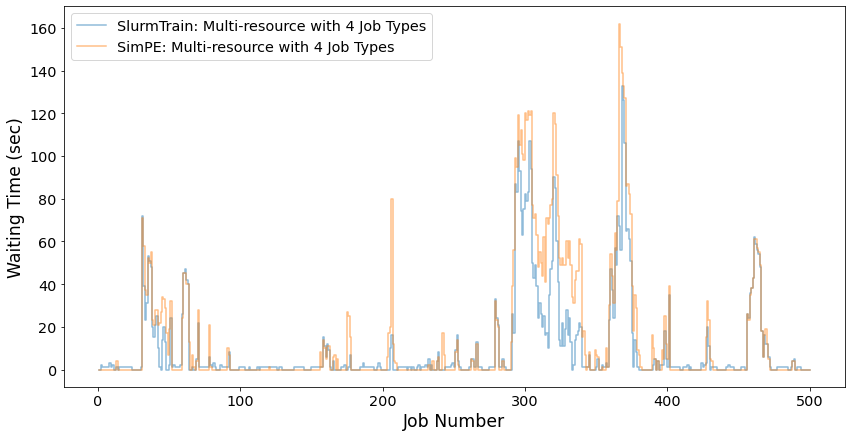

In [25]:
# n = 200

fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
save_this_plot = True

run = 2
j = run-1

st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
st_acct['job_name'] = st_acct['JobName'].astype(int)
st_acct['RunType'] = 'slurmtrain'
st_acct['SchedType'] = 'FIFO'

sala_jobs = dic_sala_fifo_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
sala_jobs['RunType'] = 'salabim'
sala_jobs['SchedType'] = 'FIFO'

compare_wait = pd.merge(left=sala_jobs, 
                        right=st_acct, 
                        how="inner",
                        on="job_name",
                        suffixes = ("_sala", "_st")
                        )

compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1


# Plot
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_st,
    where='post',
    label = st_plot_label,
    alpha=.5)

# Plot 
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_sala,
    where='post',
    label = sala_plot_label,
    alpha=.5)

ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_step_plot_run{run}"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

if save_this_plot:
    plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

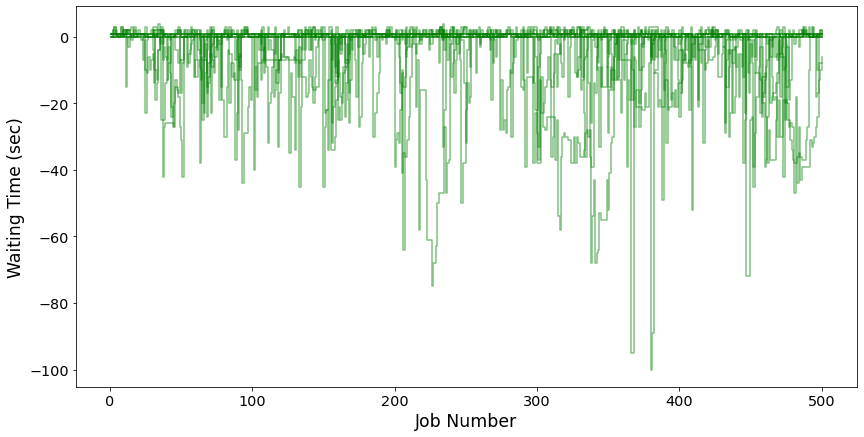

In [26]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

for j in runs:
    st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'Priority'

    sala_jobs = dic_sala_fifo_dfjobs[j].loc[:, ['job_name', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'Priority'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st - compare_wait.wait_time_sala,
        where='post',
        label = f"Jitter: SlurmTrain - SimPE",
        c='g',
        alpha=.5,
        )
    
# ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

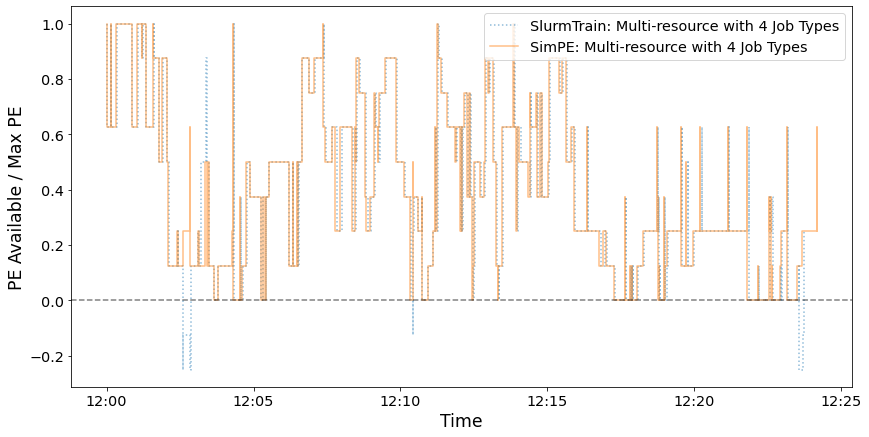

In [51]:
n = 100
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
# save_this_plot = True

save_this_plot = True

run = 1
j = run-1

# Separate plot ... to show negative PE....petime plots ... 

petime_1 = dic_st_fifo_petime[j].loc[0:2*n, :].copy()
# st_acct['job_name'] = st_acct['JobName'].astype(int)
# petime_1['event_time'] = petime_1.event_time - petime_1.event_time.values[0]
petime_1['RunType'] = 'slurmtrain'
petime_1['SchedType'] = 'FIFO'
petime_1_label = st_plot_label


petime_2 = dic_sala_fifo_petime[j].loc[0:2*n, :].copy()
# petime_2['event_time'] = petime_2.event_time - petime_2.event_time.values[0]
# sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
petime_2['RunType'] = 'salabim'
petime_2['SchedType'] = 'FIFO'
petime_2_label = sala_plot_label


# Plot graph

fig, ax = plt.subplots(figsize=[14,7])

# for ax in axs.flat:
# #     ax.xaxis.set_minor_locator(mdates.AutoDateLocator(interval_multiples=True))
#     ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=4))
# #     ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(11,19,1))) # Finetune! Or make more auto!
# #     ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(9,19,3))) # Finetune! Or make more auto!
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))

# ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=5))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Plot 1

# ax = axs[0,0]

ax.step(petime_1.event_time, 
        petime_1.pe_avail_norm,
        where='post',  # Baie NB!
        label = petime_1_label,
        linestyle='dotted',
        alpha=0.5)

ax.step(petime_2.event_time, 
        petime_2.pe_avail_norm,
        where='post',  # Baie NB!
        label = petime_2_label,
        alpha=0.5)

# Add a line at 0.0
plt.axhline(y=0, color='k', linestyle='dashed', alpha = 0.5)

ax.legend(loc="upper right")
ax.set_xlabel('Time')
ax.set_ylabel(r'PE Available / Max PE')

# Add save this plot stuff!!! 

myrun_models = f"{myrun_type}_petime_plot_run{run}"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

### Jitter Wait Delta: histogram

In [28]:
run_idxs=[x-1 for x in load_runs]

list_compare_wait = []

for j in run_idxs:
    st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'pe_req', 'ReqCPUS', 'ReqMem', 'wait_time']].copy()
    st_acct = st_acct.rename(columns={'pe_req':'job_pe_req'})
    st_acct.ReqMem = st_acct.ReqMem.str.replace('Mn', '').astype(int)
    st_acct['ReqMemPE'] = (st_acct.ReqMem / NODE_RAM) *  NODE_CPUS
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    sala_jobs = dic_sala_fifo_dfjobs[j].loc[:, ['job_name', 'job_pe_req', 'wait_time']].copy()
    sala_jobs['job_name'] = sala_jobs['job_name'].astype(int)
    sala_jobs['RunType'] = 'salabim'
    sala_jobs['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=sala_jobs, 
                            right=st_acct, 
                            how="inner",
                            on=["job_name", "job_pe_req"],
                            suffixes = ("_sala", "_st")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_sala
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "job_pe_req","ReqCPUS", "ReqMem", "ReqMemPE",
                             "wait_time_st", "wait_time_sala", "delta_wait"]]
                   )

compare_wait_all.head()

,run_num,SchedType_st,Job Number,job_name,job_pe_req,ReqCPUS,ReqMem,ReqMemPE,wait_time_st,wait_time_sala,delta_wait
0,1,FIFO,1,1000,3,3,7424,1.0,0.0,0.0,0.0
1,1,FIFO,2,1001,3,3,22272,3.0,0.0,0.0,0.0
2,1,FIFO,3,1002,3,1,22272,3.0,1.0,0.0,1.0
3,1,FIFO,4,1003,1,1,7424,1.0,1.0,0.0,1.0
4,1,FIFO,5,1004,3,1,22272,3.0,1.0,0.0,1.0


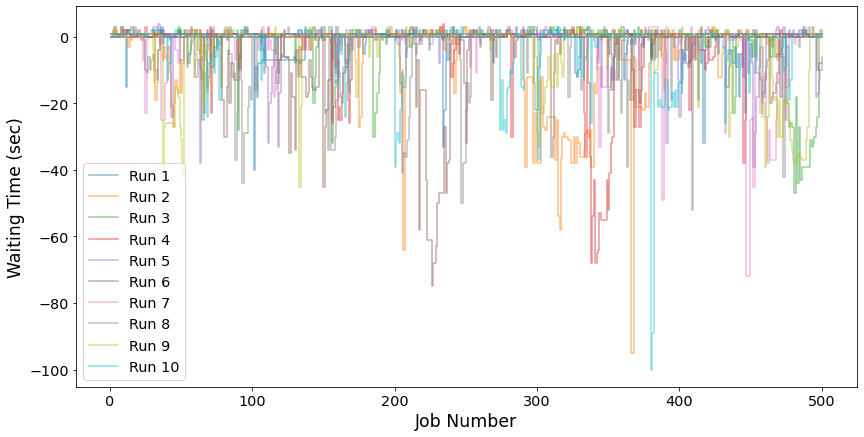

In [29]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

compare_wait_all=compare_wait_all.set_index('run_num')

for run in compare_wait_all.index.unique():
    # Plot
    
    ax.step(compare_wait_all.loc[run]['Job Number'], 
        compare_wait_all.loc[run].delta_wait,
        where='post',
        label = f"Run {run}",
#         c='g',
        alpha=.5,
        )

compare_wait_all=compare_wait_all.reset_index()
    
ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_wait_jitter_plot_colour"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

# plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

# Wait Tables

#### Wait Table All

In [30]:
wait_table_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_st' : ['mean'],
       'wait_time_sala' : ['mean']})
 .reset_index(drop=False)
)

wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

wait_table_all["ratio"] =  wait_table_all.wait_time_sala / wait_table_all.wait_time_st

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_st,wait_time_sala,delta,ratio
,,count,mean,mean,,
0,1,500,11.274,12.192,-0.918,1.081426
1,2,500,9.980,14.752,-4.772,1.478156
2,3,500,7.376,9.190,-1.814,1.245933
3,4,500,4.858,7.496,-2.638,1.543022
4,5,500,5.618,6.618,-1.000,1.177999
5,6,500,7.302,10.874,-3.572,1.489181
6,7,500,7.946,10.060,-2.114,1.266046
7,8,500,3.950,7.212,-3.262,1.825823
8,9,500,6.250,9.558,-3.308,1.529280


In [31]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all
    .loc[:, ["run_num", "wait_time_sala", "wait_time_st", "ratio"
             #, "delta"
            ]]
    .droplevel(1, axis=1)
    .to_latex(index = False,
            column_format = 'ccccc',
            header=["Run Number", 
                    r"$\overline{W}^{(mr4)}_{PE}$",
                    r"$\overline{W}^{(mr4)}_{ST}$",
                    r"$\overline{W}^{(mr4)}_{PE} / \overline{W}^{(mr4)}_{ST}$"
                    # ,r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun-multiresource-4jt_wait_table_all.tex
LATEX INCLUDE: fiforun-multiresource-4jt_wait_table_all.tex

\begin{tabular}{ccccc}
\toprule
Run Number & $\overline{W}^{(mr4)}_{PE}$ & $\overline{W}^{(mr4)}_{ST}$ & $\overline{W}^{(mr4)}_{PE} / \overline{W}^{(mr4)}_{ST}$ \\
\midrule
         1 &                       12.19 &                       11.27 &                                               1.08 \\
         2 &                       14.75 &                        9.98 &                                               1.48 \\
         3 &                        9.19 &                        7.38 &                                               1.25 \\
         4 &                        7.50 &                        4.86 &                                               1.54 \\
         5 &                        6.62 &                        5.62 &                                               1.18 \\
         6 &                       10.87 &        

#### Wait Table Metrics

In [32]:
# Waiting time all jobs - metric table

wait_table_all_metrics = wait_table_all.copy()

wait_table_all_metrics.columns = wait_table_all_metrics.columns.droplevel(1)

# metrics = ['min', 'max',  'std', 'mean']
# metric_names = ['min', 'max', '$s_{dev}$', 'average']

wait_table_all_metrics = (wait_table_all_metrics
                          .drop(columns=['run_num', 'job_name', 'delta'])
                          .agg(metrics)
                          .reset_index()
                          .rename(columns={'index':'metric'})
                          .assign(metric_name = metric_names)
                         )

wait_table_all_metrics

# wait_table_all.columns

,metric,wait_time_st,wait_time_sala,ratio,metric_name
0,min,3.950000,6.618000,1.081426,min
1,max,11.274000,14.752000,1.825823,max
2,std,2.223558,2.450029,0.219620,$s_{dev}$
3,mean,7.210400,9.778800,1.393965,average


In [33]:
table_name = f"{myrun_type}_wait_table_all_metrics.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = (wait_table_all_metrics
    .loc[:, ["metric_name", "wait_time_sala", "wait_time_st", "ratio"
            # , "delta"
            ]]
    .to_latex(index = False,
            column_format = 'lcccc',
            header=["Metric", 
                    r"$\overline{W}^{(mr4)}_{PE}$",
                    r"$\overline{W}^{(mr4)}_{ST}$",
                    r"$\overline{W}^{(mr4)}_{PE} / \overline{W}^{(mr4)}_{ST}$" #,
              #      r"$\overline{W}_{ST} - \overline{W}_{PE}$"
                   ],
            float_format="%.2f",
            escape = False)
)

# # Modifications to the latex table code:

# latex_list = latex_table.splitlines()

# new_header_list = [
# r"\begin{tabular}{lrrrr}",
# r"\toprule",
# r"& & \multicolumn{3}{c}{Average Waiting Time (sec)} \\ \cline{3-5}" ,
# r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
# r"\midrule"
# ]

# latex_new_list = new_header_list + latex_list[2:]

# # # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # # for i,line in enumerate(latex_list): 
# # #     if line.find(r"\begin{table}") >= 0: 
# # #         latex_list[i] = r"\begin{table}[!ht]"

# latex_new_table = "\n".join(latex_new_list)
    
# print(latex_new_table)

print(latex_table)

# # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun-multiresource-4jt_wait_table_all_metrics.tex
LATEX INCLUDE: fiforun-multiresource-4jt_wait_table_all_metrics.tex

\begin{tabular}{lcccc}
\toprule
    Metric & $\overline{W}^{(mr4)}_{PE}$ & $\overline{W}^{(mr4)}_{ST}$ & $\overline{W}^{(mr4)}_{PE} / \overline{W}^{(mr4)}_{ST}$ \\
\midrule
       min &                        6.62 &                        3.95 &                                               1.08 \\
       max &                       14.75 &                       11.27 &                                               1.83 \\
 $s_{dev}$ &                        2.45 &                        2.22 &                                               0.22 \\
   average &                        9.78 &                        7.21 &                                               1.39 \\
\bottomrule
\end{tabular}



#### Wait Table Job Type

In [34]:
# Waiting Time per job 

wait_table_jobtype_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_pe_req', 'job_name', 'ReqCPUS', 'ReqMemPE', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .assign(str_job_pe_req = lambda x: x.job_pe_req.astype(str))
 .groupby(['run_num','str_job_pe_req', 'ReqCPUS', 'ReqMemPE'])
 .agg({'job_name' : ['count'],
       'wait_time_sala' : ['mean'],
       'wait_time_st' : ['mean']})
 .reset_index(drop=False)
)

wait_table_jobtype_all["ratio"] = wait_table_jobtype_all.wait_time_sala / wait_table_jobtype_all.wait_time_st

wait_table_jobtype_all["delta"] = wait_table_jobtype_all.wait_time_st - wait_table_jobtype_all.wait_time_sala

wait_table_jobtype_all.columns = wait_table_jobtype_all.columns.droplevel(1)
wait_table_jobtype_all.rename(columns={'job_name':'job_count',
                                       'str_job_pe_req' : 'job_pe_req'}, inplace=True)

wait_table_jobtype_all["job_type"] = (wait_table_jobtype_all.job_pe_req +
" PE - " + 
wait_table_jobtype_all.ReqCPUS.astype(str) + 
" CPU(s), " + 
wait_table_jobtype_all.ReqMemPE.astype(int).astype(str) + 
" RAM (in PE)"
)

wait_table_jobtype_all.head()

,run_num,job_pe_req,ReqCPUS,ReqMemPE,job_count,wait_time_sala,wait_time_st,ratio,delta,job_type
0,1,1,1,1.0,243,12.119342,11.687243,1.036972,-0.432099,"1 PE - 1 CPU(s), 1 RAM (in PE)"
1,1,3,1,3.0,95,15.947368,14.694737,1.085244,-1.252632,"3 PE - 1 CPU(s), 3 RAM (in PE)"
2,1,3,3,1.0,74,9.216216,6.932432,1.329435,-2.283784,"3 PE - 3 CPU(s), 1 RAM (in PE)"
3,1,3,3,3.0,88,10.840909,10.090909,1.074324,-0.750000,"3 PE - 3 CPU(s), 3 RAM (in PE)"
4,2,1,1,1.0,259,10.810811,6.745174,1.602748,-4.065637,"1 PE - 1 CPU(s), 1 RAM (in PE)"


In [35]:
batch_count = wait_table_jobtype_all.run_num.max()

wait_table_jobtype_table = (wait_table_jobtype_all
                            .groupby(["job_pe_req", "job_type"])
                            .agg({'job_count' : ['sum'],
                                  'wait_time_sala' :['mean'],
                                  'wait_time_st' :['mean']})
                            .sort_index(ascending=[True, True])
                            .droplevel(1,axis=1)
                            .reset_index(drop=False)
                            .assign(ratio = lambda x: x.wait_time_sala / x.wait_time_st)
                            .assign(delta = lambda x: x.wait_time_st - x.wait_time_sala)
                            .assign(jobs_per_batch = lambda x: x.job_count / batch_count)
)

wait_table_jobtype_table

,job_pe_req,job_type,job_count,wait_time_sala,wait_time_st,ratio,delta,jobs_per_batch
0,1,"1 PE - 1 CPU(s), 1 RAM (in PE)",2580,7.379328,5.614341,1.314371,-1.764987,258.0
1,3,"3 PE - 1 CPU(s), 3 RAM (in PE)",830,12.563773,8.697075,1.444597,-3.866697,83.0
2,3,"3 PE - 3 CPU(s), 1 RAM (in PE)",774,11.532395,7.804171,1.477722,-3.728224,77.4
3,3,"3 PE - 3 CPU(s), 3 RAM (in PE)",816,12.873794,10.083634,1.276702,-2.790160,81.6


In [36]:
table_name = f"{myrun_type}_wait_table_jobtypes.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
print("")

latex_table = (wait_table_jobtype_table
               .loc[:, ['job_type', 'jobs_per_batch', 'wait_time_sala', 'wait_time_st', 'ratio']]
               .to_latex(
    index=False,
    column_format='lccccc',
    header=["Job Type", 
#             "Average Jobs Per Batch",
            r"\begin{tabular}[c]{@{}c@{}}Average Jobs\\ Per Batch\end{tabular}",
            r"$\mu_{\overline{W}^{(mr4)}_{PE}}$",
            r"$\mu_{\overline{W}^{(mr4)}_{ST}}$",
            r"$\mu_{\overline{W}^{(mr4)}_{PE}} / \mu_{\overline{W}^{(mr4)}_{ST}}$" #,
            #r"$\mu_{\overline{W}_{ST}} - \mu_{\overline{W}_{PE}}$"
           ],
    float_format="%.2f",
    escape = False) 
)
    
print(latex_table)
    
# # # Write Output
with open(table_path, 'w') as f:
    f.write(latex_table)

LATEX OUTPUT: images/results/tables/fiforun-multiresource-4jt_wait_table_jobtypes.tex
LATEX INCLUDE: fiforun-multiresource-4jt_wait_table_jobtypes.tex

\begin{tabular}{lccccc}
\toprule
                       Job Type & \begin{tabular}[c]{@{}c@{}}Average Jobs\\ Per Batch\end{tabular} & $\mu_{\overline{W}^{(mr4)}_{PE}}$ & $\mu_{\overline{W}^{(mr4)}_{ST}}$ & $\mu_{\overline{W}^{(mr4)}_{PE}} / \mu_{\overline{W}^{(mr4)}_{ST}}$ \\
\midrule
 1 PE - 1 CPU(s), 1 RAM (in PE) &                                             258.00 &                              7.38 &                              5.61 &                                               1.31 \\
 3 PE - 1 CPU(s), 3 RAM (in PE) &                                              83.00 &                             12.56 &                              8.70 &                                               1.44 \\
 3 PE - 3 CPU(s), 1 RAM (in PE) &                                              77.40 &                             11.53 &              

### OLD Wait Tables

In [37]:
wait_table_all = (compare_wait_all
#  .query("run_num == 1")
 .loc[:, ['run_num', 'job_name', 'wait_time_st', 'wait_time_sala', 'delta_wait']]
 .groupby('run_num')
 .agg({'job_name' : ['count'],
       'wait_time_st' : ['mean'],
       'wait_time_sala' : ['mean']})
 .reset_index(drop=False)
)

wait_table_all["delta"] = wait_table_all.wait_time_st - wait_table_all.wait_time_sala

# wait_table_all.columns = wait_table_all.columns.droplevel(1)

# wait_table_all = wait_table_all.rename(columns={'run_num':'Run Number'})

# wait_table_all.set_index('Run Number', inplace=True)

# mycolumns = [('', 'Run Number'),
#              ('', 'Job Count'), 
#              ('Waiting Time', 'SlurmTrain'),
#              ('Waiting Time', 'SimPE'),
#              ('Waiting Time', 'Delta')]

# wait_table_all.columns = pd.MultiIndex.from_tuples(mycolumns)

wait_table_all

,run_num,job_name,wait_time_st,wait_time_sala,delta
,,count,mean,mean,
0,1,500,11.274,12.192,-0.918
1,2,500,9.980,14.752,-4.772
2,3,500,7.376,9.190,-1.814
3,4,500,4.858,7.496,-2.638
4,5,500,5.618,6.618,-1.000
5,6,500,7.302,10.874,-3.572
6,7,500,7.946,10.060,-2.114
7,8,500,3.950,7.212,-3.262
8,9,500,6.250,9.558,-3.308


In [38]:
table_name = f"{myrun_type}_wait_table_all.tex"
table_path = Path(f'{save_image_path}/tables/{table_name}')

print(f"LATEX OUTPUT: {table_path}")
print(f"LATEX INCLUDE: {table_name}")
# print(f"LATEX INCLUDE: \input{{{str(table_path.relative_to('images'))}}}")
print("")

latex_table = wait_table_all.to_latex(column_format='lrrrr',
#                                       multirow=True,
                                      header=False,
                                      index=False
#                                       multicolumn_format='c'
                                      # caption="FIFO Results Table",
                                      # label=table_name
                                     )

# Modifications to the latex table code:

latex_list = latex_table.splitlines()

new_header_list = [
r"\begin{tabular}{lrrrr}",
r"\toprule",
r"& & \multicolumn{3}{c}{Waiting Time (sec)} \\ \cline{3-5}" ,
r"Run Number & Count & SlurmTrain & SimPE & Delta \\",
r"\midrule"
]

latex_new_list = new_header_list + latex_list[2:]

# # latex_list.insert(3, r'\cmidrule(lr){3-5} \\')

# # for i,line in enumerate(latex_list): 
# #     if line.find(r"\begin{table}") >= 0: 
# #         latex_list[i] = r"\begin{table}[!ht]"

latex_new_table = "\n".join(latex_new_list)
    
print(latex_new_table)
    
# # Write Output
# with open(table_path, 'w') as f:
#     f.write(latex_new_table)

LATEX OUTPUT: images/results/tables/fiforun-multiresource-4jt_wait_table_all.tex
LATEX INCLUDE: fiforun-multiresource-4jt_wait_table_all.tex

\begin{tabular}{lrrrr}
\toprule
& & \multicolumn{3}{c}{Waiting Time (sec)} \\ \cline{3-5}
Run Number & Count & SlurmTrain & SimPE & Delta \\
\midrule
  1 &  500 &  11.274 &  12.192 & -0.918 \\
  2 &  500 &   9.980 &  14.752 & -4.772 \\
  3 &  500 &   7.376 &   9.190 & -1.814 \\
  4 &  500 &   4.858 &   7.496 & -2.638 \\
  5 &  500 &   5.618 &   6.618 & -1.000 \\
  6 &  500 &   7.302 &  10.874 & -3.572 \\
  7 &  500 &   7.946 &  10.060 & -2.114 \\
  8 &  500 &   3.950 &   7.212 & -3.262 \\
  9 &  500 &   6.250 &   9.558 & -3.308 \\
 10 &  500 &   7.550 &   9.836 & -2.286 \\
\bottomrule
\end{tabular}


### Histograms

In [39]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

# j = 0
# x = list_compare_wait[j].delta_wait
    
# # sns.histplot(list_compare_wait[j].delta_wait)
# # plt.hist(x, density=True)

# counts, bins = np.histogram(x)
# plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
# hist(x, bins='knuth', density=True)

# # n, bins, patches = hist(x, bins="knuth", density=True) # For continues x
# # showbins = np.round(bins, 1)

# # n, bins, patches = hist(x, density=True) # For discrete x
# # showbins = bins.astype(int)

# # # centre labels
# # n_bins =len(bins)-1
# # ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
# # ticklabels = [showbins[i] for i in range(n_bins)]
# # plt.xticks(ticks, ticklabels)

# plt.title(f"Run {j+1}")
# plt.show()

In [40]:
from astropy.visualization import hist
from scipy.stats import norm, t

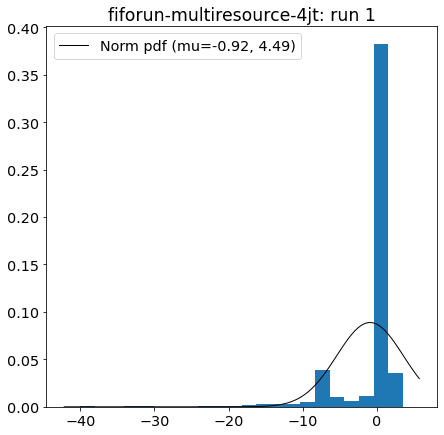

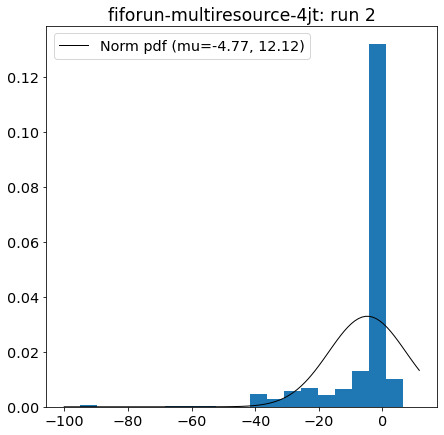

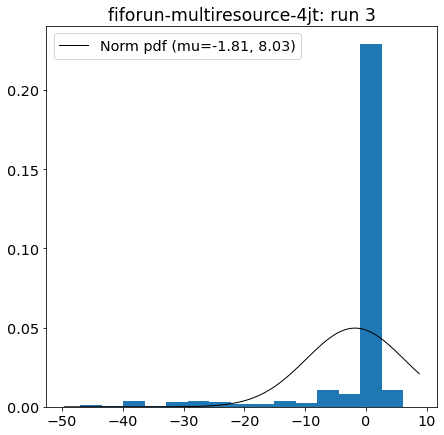

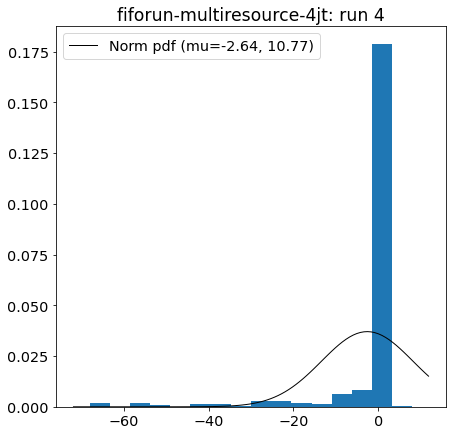

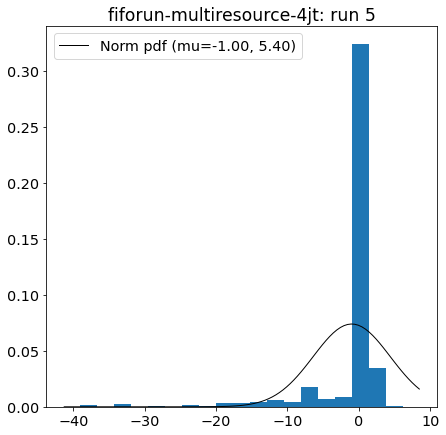

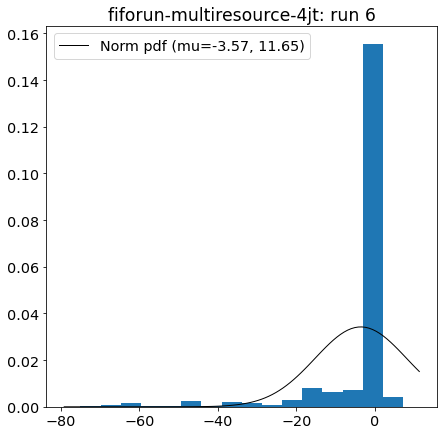

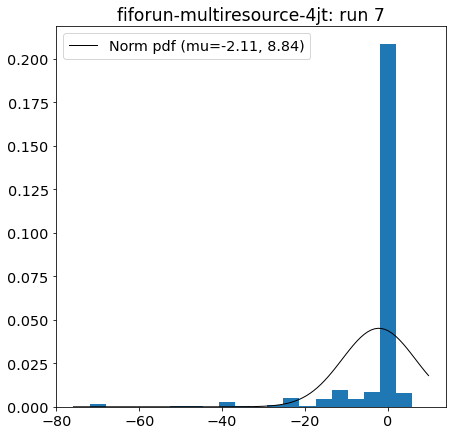

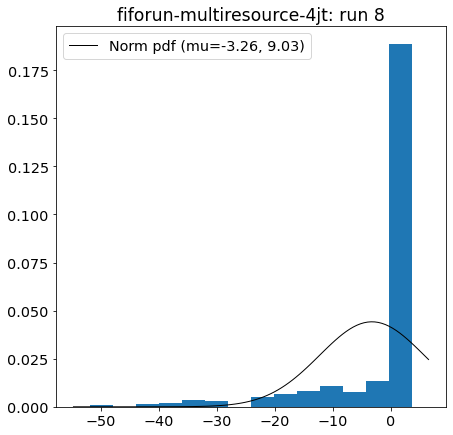

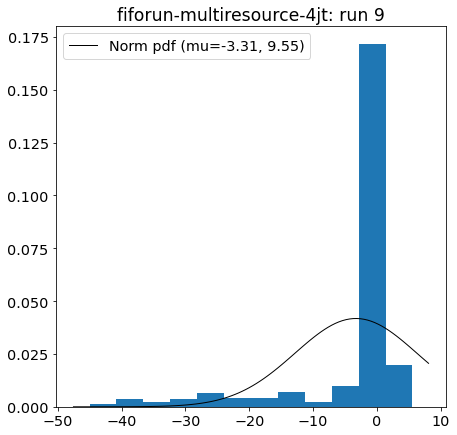

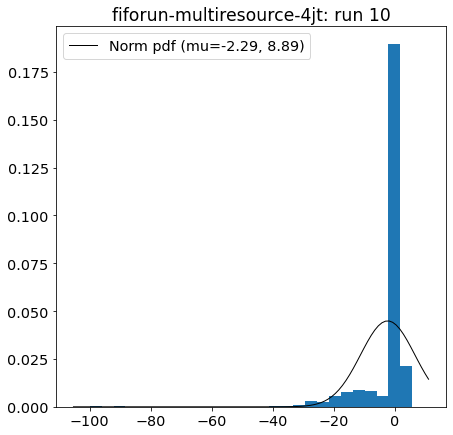

In [41]:
# Plot histogram
for j in range(10):

    fig, ax = plt.subplots(figsize=[7,7])
    
    x = list_compare_wait[j].delta_wait
    
    # sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
    n, bins, patches = hist(x, bins='scott', density=True)
#     n, bins, patches = hist(x, bins='freedman', density=True)
#     hist(x, bins="knuth", density=True)
    
    mu, std = norm.fit(x) 

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x_axis = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_axis, mu, std)

    plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, {std:.2f})")
    
    ax.legend()
    
    plt.title(f"{myrun_type}: run {j+1}")
    
    myrun_models = f"{myrun_type}_run{j+1}_wait_jitter_distrib"
    pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

    plt.savefig(pltpath, facecolor='w', transparent=False)
    
    plt.show()

In [42]:
# # Plot normalised histogram
# for j in range(10):
#     x = list_compare_wait[j].delta_wait
#     mu_x = np.mean(x)
#     sd_x = np.nanstd(x)
#     x_norm = (x - mu_x) / sd_x
    
# #     sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
#     n, bins, patches = hist(x_norm, bins='scott')
    
#     plt.title(f"Run {j+1}. Normalised with mu: {mu_x:.2f}, sd: {sd_x: .2f} ")
#     plt.show()

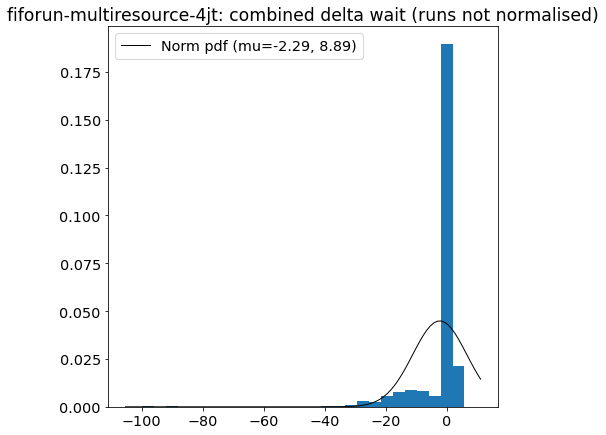

In [43]:
from scipy.stats import norm

# Plot normalised histogram
combined_x = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x = x
    
# Plot
fig, ax = plt.subplots(figsize=[7,7])
n, bins, patches = hist(combined_x, bins='scott', density=True, ax = ax)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(combined_x) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)

plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, {std:.2f})")

ax.legend()

plt.title(f"{myrun_type}: combined delta wait (runs not normalised)")

myrun_models = f"{myrun_type}_run{j+1}_combined_non_norm"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [44]:
print(f"mean : {np.mean(combined_x):.2f}")
print(f"std: {np.std(combined_x):.2f}")
print(f"median : {np.median(combined_x):.2f}")

mean : -2.29
std: 8.89
median : 0.00


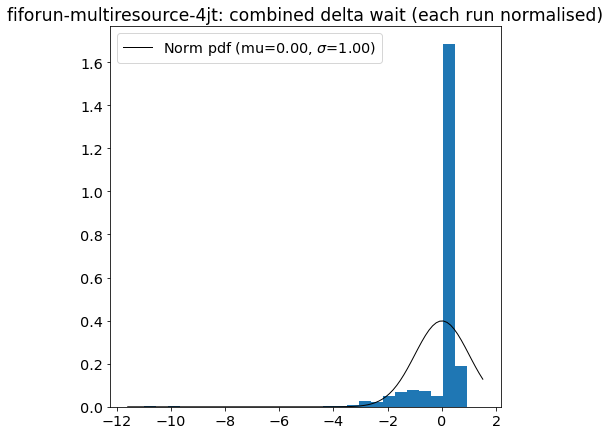

In [45]:
# Plot normalised histogram
combined_x_norm = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x_norm = x_norm
    
# Plot
fig, ax = plt.subplots(figsize=[7,7])
n, bins, patches = hist(combined_x_norm, bins='scott', density=True, ax = ax)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(combined_x_norm) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, $\sigma$={std:.2f})")

# T distribution
# t_df, t_loc, t_scale = t.fit(combined_x_norm)
# p_t = t.pdf(x_axis, t_df, loc=t_loc, scale=t_scale)
# plt.plot(x_axis, p_t, 'b', linewidth=1, label=f"T pdf (df={t_df:.2f}, loc={t_loc:.2f}, scale={t_scale:.2f}")

ax.legend()

plt.title(f"{myrun_type}: combined delta wait (each run normalised)")

myrun_models = f"{myrun_type}_run{j+1}_combined_norm"
pltpath = f'{save_image_path}/debug/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [46]:
print(f"mean : {np.mean(combined_x_norm)}")
print(f"std: {np.std(combined_x_norm)}")

mean : 1.4210854715202004e-17
std: 0.9999999999999999


### Average Waiting time plots

In [47]:
# ?sns.catplot
# ?sns.relplot

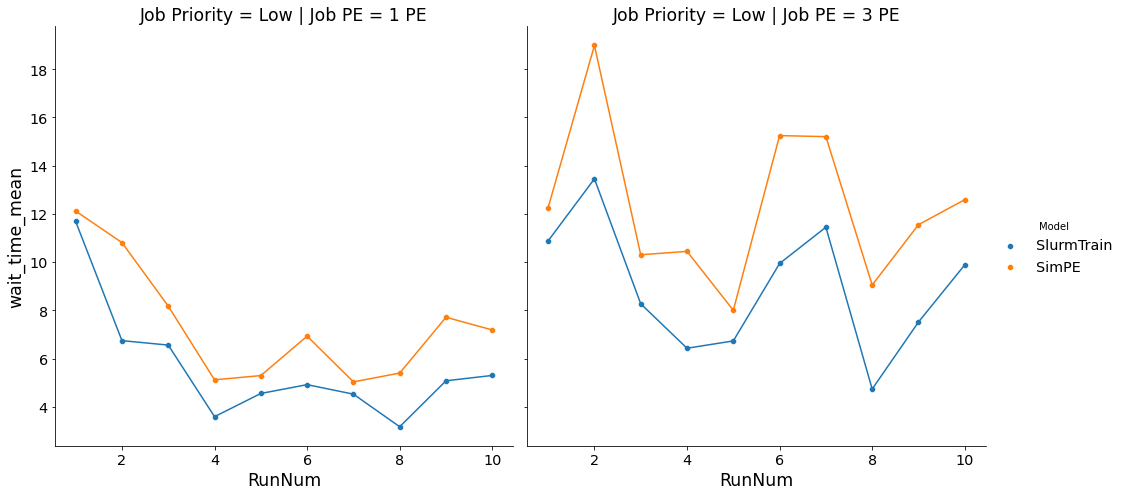

In [48]:
# Job Priority Graph

fg = sns.FacetGrid(df_plot_fifo, 
                    hue = "Model",
                    row = "Job Priority",
                    col = "Job PE",
                    height = 7
                  )

fg.map(sns.scatterplot, "RunNum", "wait_time_mean")
fg.map(sns.lineplot, "RunNum", "wait_time_mean")
fg.add_legend()

plt.show()

In [49]:
# WTF IS GOING ON HERE !!
# THESE SHOULD BE MATCHING!!!!!

In [50]:
fg = sns.FacetGrid(df_plot_prio, 
                    hue = "Model",
                    row = "Job Priority",
                    col = "Job PE",
                    height = 7,
                    
                  )

fg.map(sns.scatterplot, "RunNum", "wait_time_mean")
fg.map(sns.lineplot, "RunNum", "wait_time_mean")

fg.add_legend()

fg.set_ylabels("Average Waiting Time")

myrun_models = "slurmtrain_simpe"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

NameError: name 'df_plot_prio' is not defined

In [ ]:
df_plot.query("RunNum == 10 and job_prio == 1 and Model == 'SlurmTrain'")

In [ ]:
# Lets show this on one graph

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue="Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
#                   style_order = (3,1),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

plt.show()

In [ ]:
# TWO GRAPHS: 
# SLURMSIM VS SLURMTRAIN
# FIFO VS BF  -> wys backfills speed up 

In [ ]:
# No 8 version

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot_no8, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue="Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot_no8,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
#                   style_order = (3,1),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

plt.show()

In [ ]:
# IDEA FOR FOLLOW UP GRAPH :  actual running times of jobs vs expected times ... 

#### Volgende probeerslae

In [ ]:
# ?sns.catplot
# ?sns.relplot

In [ ]:
sns.relplot(data=df_plot, 
            x = "job_prio")

In [ ]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Model", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# # Draw line plot
# g.map(sns.lineplot, 
#       "RunNum", 
#       "wait_time_mean",
#       ci = None)

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, 
      "RunNum", 
      "wait_time_mean", 
      "Job PE",
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for Backfill Jobs')

plt.show()

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_light, facet_wrap

p = (
    ggplot(df_plot) +
    geom_point(aes("RunNum", "wait_time_mean", colour="Job PE")) + 
    theme_light() + 
    facet_wrap("Model")
)

p

In [ ]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars

# (ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
#  + geom_point()
#  + stat_smooth(method="lm")
#  + facet_wrap("~gear"))

In [ ]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for FIFO Jobs')

plt.show()

In [ ]:
sns.relplot(data = df_plot,
            x="RunNum",
            y="wait_time_mean",
#              col = "Job PE",
            size = "Job PE",
            sizes = (50,200),
            hue="Model",
            height=7,
            aspect=1,
            kind = "scatter"
            )

plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

sns.set_style("ticks", {'axes.grid' : True})
sns.scatterplot(x="RunNum", 
                y="wait_time_mean", 
                hue="Model", 
                size="Job PE", 
                sizes=(50, 200), 
                data=df_plot, 
                palette="tab10", 
                edgecolor=None, marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

scatter = sns.scatterplot(x="RunNum", 
                          y="wait_time_mean", 
                          hue="Model", 
                          size="Job PE", 
                          sizes=(50, 200), 
                          data=df_plot, 
                          palette="tab10", 
                          edgecolor=None, 
                          marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Handle the legend: split it into two parts
handles, labels = scatter.get_legend_handles_labels()

# Show legend for RunType
legend1 = plt.legend(handles=handles[1:3], labels=labels[1:3], title="RunType", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handletextpad=0.1)
plt.gca().add_artist(legend1)

# Show legend for job_pe_req
plt.legend(handles=handles[3:], labels=labels[3:], title="", bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0., handletextpad=0.1)

plt.show()

## Junk

In [ ]:
# rng = np.random.default_rng()
# rng

In [ ]:
# # T-test example

# rvs1 = stats.expon.rvs(loc=10,size=100,random_state=rng)
# rvs2 = (rvs1stats.expon.rvs(loc=10,size=100,random_state=rng)
#        )
#         # rvs1[1] = np.nan
# a = stats.ttest_rel(rvs1, rvs2)

# print(a.statistic)
# print(a.pvalue)

In [ ]:
rvs1

In [ ]:
rvs2

In [ ]:
# %run ./srun8_slurmtrain.ipynb